In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import NaturalEarthFeature


/Users/xujiayu/opt/anaconda3/envs/research/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 1. Global Earthquakes

In [2]:
#  read data
df = pd.read_csv('usgs_earthquakes.csv')
#df

In [3]:
# magnitude of the 50-th earthquake
num50 = df.sort_values('mag', ascending = False).iloc[49]

# find the number of earthquakes in top 50
print(np.shape(df[df['mag'] >= num50.mag]))


(54, 15)


In [4]:
# select all of the earthquakes which magnitude is not less number 50's earthquake

top50 = df.sort_values('mag', ascending = False).head(54)


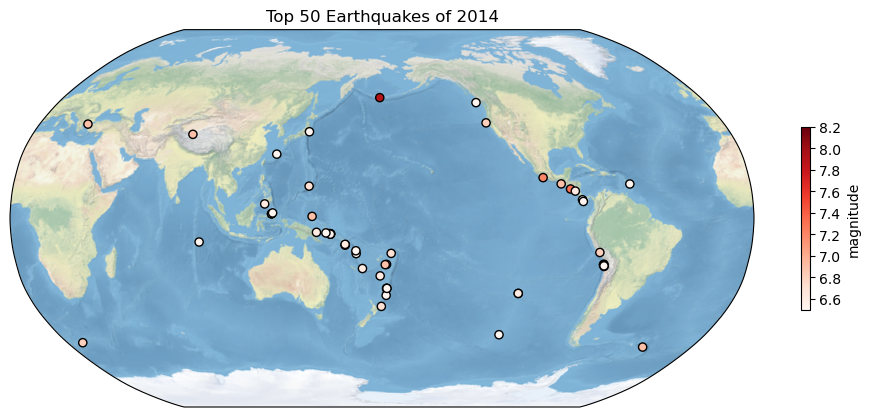

In [5]:
# Create and define the size of a figure object 
plt.figure(figsize=(12,11),dpi=100)

# Create an ax with Robinson projection style with 180 in the middle.
ax = plt.axes(projection=ccrs.Robinson(180))

# Add background
ax.stock_img()

# Set title
ax.set_title('Top 50 Earthquakes of 2014')

# Point Plot and style setting
a = ax.scatter('longitude', 'latitude', data=top50, transform=ccrs.PlateCarree(),
            s=35, c='mag', cmap='Reds',
            edgecolors='black', linewidths=1.0)

# Colorbar setting
plt.colorbar(a, shrink = 0.22,ticks = np.arange(6.6,8.3,0.2),label = 'magnitude')
plt.show()

# 2. Explore a netCDF dataset

The NetCDF data is wind speed data of the year 2022 from ERA5.


### 2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box.

In [6]:
#load data 
# u and v directions
ncfile = 'data.nc'

df = xr.open_dataset(ncfile)
df

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-04 08:00:43 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [7]:
u = df['u10']
v = df['v10']

df['windspeed'] = np.sqrt(u**2 + v**2)
ws = df['windspeed'].mean(dim='time')

<Figure size 1080x720 with 0 Axes>

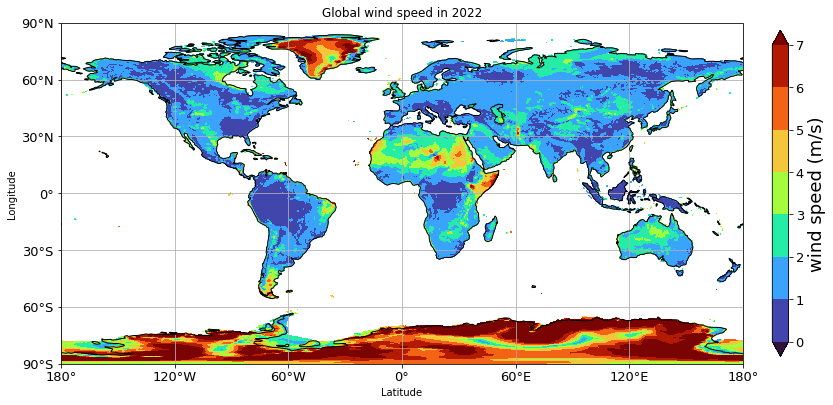

In [8]:
# plot the figure
fig = plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 10)

#Set the projection information
proj = ccrs.PlateCarree(central_longitude=0)

fig,ax = plt.subplots(subplot_kw=dict(projection=proj))


plotx_date = ws
lon = ws.longitude
lat = ws.latitude
levelx = np.arange(0,8,1)

plotx_plot = ax.contourf(lon,lat,plotx_date,levels=levelx,extend='both', cmap=plt.cm.turbo, zorder=2,transform=ccrs.PlateCarree())

#Add coastlines
ax.set_global()
ax.coastlines(zorder=10)

#Set X and Y axes.
ax.set_xticks([-180,-120,-60,0,60,120,180],crs=ccrs.PlateCarree())
ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.tick_params(axis='both',labelsize=13)

# set gridlines
gl = ax.gridlines()

cbar = plt.colorbar(plotx_plot,shrink=0.6,pad=0.035,ax=ax)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('wind speed (m/s)',fontsize=18)


plt.title('Global wind speed in 2022')

plt.show()

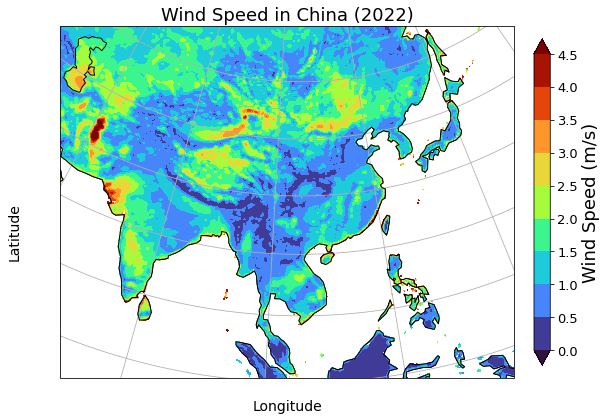

In [9]:
# Regional map with different projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.LambertConformal(central_longitude=105, central_latitude=35)))

plotx_date = ws
lon = ws.longitude
lat = ws.latitude
levelx = np.arange(0,5,0.5)

plotx_plot = ax.contourf(lon, lat, plotx_date, levels=levelx, extend='both', cmap=plt.cm.turbo, zorder=2, transform=ccrs.PlateCarree())

# Add coastlines
ax.coastlines(zorder=10)

# Add political boundaries
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

#label
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

# Annotation
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes, fontsize=14)
ax.text(-0.1, 0.5, 'Latitude', va='center', ha='right', rotation='vertical', rotation_mode='anchor', transform=ax.transAxes, fontsize=14)


lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=13)

# Set gridlines
gl = ax.gridlines()

cbar = plt.colorbar(plotx_plot, shrink=0.6, pad=0.035, ax=ax)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Wind Speed (m/s)', fontsize=18)

extents = [70, 136, 0, 55]
ax.set_extent(extents)

plt.title('Wind Speed in China (2022)', fontsize=18)

plt.show()